## EDA Start for Accidental Deaths & Suicides

In [123]:
# Essentials
import pandas as pd
pd.set_option('display.max_columns', 100)
import csv
import numpy as np
import os

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stats
from scipy import stats
from scipy.stats import skew

In [201]:
#Importing age related looksups
age_27=pd.read_excel('Downloads/Data/Lookup/age_27_rev_LKP.xlsx')
age_27['age_recode_27'] = age_27['age_recode_27'].astype(str)
age_27['age_recode_27'] = age_27['age_recode_27'].str.zfill(2)
######################################################################
age_12=pd.read_excel('Downloads/Data/Lookup/age_12_rev_LKP.xlsx')
#COnverting int to obj type followed  by str type and padding
age_12['age_recode_12'] = age_12['age_recode_12'].astype(str)
age_12['age_recode_12'] = age_12['age_recode_12'].str.zfill(2)
######################################################################
age_52=pd.read_excel('Downloads/Data/Lookup/age_52_rev_LKP.xlsx')
#COnverting int to obj type followed  by str type and padding
age_52['age_recode_52'] = age_52['age_recode_52'].astype(str)
age_52['age_recode_52'] = age_52['age_recode_52'].str.zfill(2)
Rpt_Age_tmpstmp=pd.read_excel('Downloads/Data/Lookup/Rpt_Age_tmpstmp.xlsx')


 

In [122]:
# works.info()  
works=pd.read_csv('Downloads/Data/mort_2018.csv')


In [104]:
# #one took up table ready and padded
# edu_1989_dtl=pd.read_excel('edu_1989_rev_LK.xlsx' )
# edu_2003_dtl=pd.read_excel('edu_2003_rev_LK.xlsx' )
# #Padding needed for th table below
# edu_1989_dtl["edu_1989_rev"] = edu_1989_dtl["edu_1989_rev"].apply(str)
# edu_1989_dtl["edu_1989_rev"] = edu_1989_dtl["edu_1989_rev"].str.zfill(2)
# #no padding needed for the one below
# edu_1989_dtl



,edu_1989_rev,edu_1989_Desc
0,00,No formal education
1,01,8th Grade or less
2,02,8th Grade or less
3,03,8th Grade or less
4,04,8th Grade or less
5,05,8th Grade or less
6,06,8th Grade or less
7,07,8th Grade or less
8,08,8th Grade or less
9,09,9 - 12 th Grade no diploma


In [127]:
# mapping descriptions to the cuase_recode_358
acc_desc = {'cause_recode_desc': ['Influenza','Pneumonia','Viral pneumonia unclassified ','Bacterial pneumonia','Pneumonia by unspecified organisms'],
        'cause_recode_358': [253,254,255,256,257]
        }

acc_desc_df = pd.DataFrame(acc_desc, columns = ['cause_recode_358', 'cause_recode_desc'])

print (acc_desc_df)

  
# filter_col = [col for col in result if col.startswith('reported')]
# filter_col
# result[filter_col]
 





   cause_recode_358                   cause_recode_desc
0               253                           Influenza
1               254                           Pneumonia
2               255       Viral pneumonia unclassified 
3               256                 Bacterial pneumonia
4               257  Pneumonia by unspecified organisms


In [128]:
#works.dtypes
# Convert the following int to string
works["age_recode_52"] = works['age_recode_52'].apply(str)
works["age_recode_27"] = works['age_recode_27'].apply(str)
works["age_recode_12"] = works['age_recode_12'].apply(str)
works["age_detail"] = works['age_detail'].apply(str)
 
    
#Check to see if the above conversion was successful
works.info() #yes the above have beeb converted to string



## #Getting the lengths of the age related fields to see if they match the pdf

works["reported_age_tmstmp_flag Length"]= works["reported_age_tmstmp_flag"].astype(str).map(len) # its 1
works["reported_age Length"]= works["reported_age"].astype(str).map(len) # its 4
works["age_detail Length"]= works["age_detail"].astype(str).map(len) # its 4
works["age_sub_flag Length"]= works["age_sub_flag"].astype(str).map(len) # its 1
works["age_recode_52 Length"]= works["age_recode_52"].astype(str).map(len) # its 2
works["age_recode_27 Length"]= works["age_recode_27"].astype(str).map(len) # its 2
works["age_recode_12 Length"]= works["age_recode_12"].astype(str).map(len)# is 1  ..pad it to make it 2
works["infant_age_recode_22 Length"]= works["infant_age_recode_22"].astype(str).map(len) # its 2 shoudl be 2 

#Checking the string lengths of the fields
works[[ "reported_age","reported_age Length","age_detail Length","age_detail","age_sub_flag","age_sub_flag Length",
      "age_recode_52","age_recode_52 Length","age_recode_27","age_recode_27 Length",
       "age_recode_12","age_recode_12 Length","infant_age_recode_22 Length","infant_age_recode_22",  
       "reported_age_tmstmp_flag","reported_age_tmstmp_flag Length"
      ]]# the length is 13.Matches the length in pdf 

#Now pad with leading zeros just in case if they are missing 
works["age_detail"] = works["age_detail"].str.zfill(4)
works["age_recode_52"] = works["age_recode_52"].str.zfill(2)
works["age_recode_27"] = works["age_recode_27"].str.zfill(2)
works["age_recode_12"] = works["age_recode_12"].str.zfill(2)
works["infant_age_recode_22"] = works["infant_age_recode_22"].str.zfill(2)
 


#Checking the string lengths of the fields after padding with leading zeros..working!
works[[ "reported_age","reported_age Length","age_detail Length","age_detail","age_sub_flag","age_sub_flag Length",
      "age_recode_52","age_recode_52 Length","age_recode_27","age_recode_27 Length",
       "age_recode_12","age_recode_12 Length","infant_age_recode_22 Length","infant_age_recode_22",  
       "reported_age_tmstmp_flag","reported_age_tmstmp_flag Length"
      ]]# the length is 13.Matches the length in pdf 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839205 entries, 0 to 2839204
Data columns (total 88 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   person_id                        int64  
 1   year_id                          int64  
 2   resident_status                  int64  
 3   edu                              int64  
 4   edu_1989_rev                     object 
 5   edu_1989_Desc                    float64
 6   edu_2003_rev                     int64  
 7   edu_2003_Desc                    object 
 8   edu_reporting_flag               int64  
 9   month_of_death                   int64  
 10  sex                              object 
 11  reported_age_tmstmp_flag         int64  
 12  reported_age                     object 
 13  age_detail                       object 
 14  age_sub_flag                     object 
 15  age_recode_52                    object 
 16  age_recode_27                    object 
 17  age_reco

,reported_age,reported_age Length,age_detail Length,age_detail,age_sub_flag,age_sub_flag Length,age_recode_52,age_recode_52 Length,age_recode_27,age_recode_27 Length,age_recode_12,age_recode_12 Length,infant_age_recode_22 Length,infant_age_recode_22,reported_age_tmstmp_flag,reported_age_tmstmp_flag Length
0,046 351507,12,4,1046,,1,35,2,15,2,07,1,2,,1,1
1,028 311105,12,4,1028,,1,31,2,11,2,05,1,2,,1,1
2,093 442411,12,4,1093,,1,44,2,24,2,11,2,2,,1,1
3,090 442411,12,4,1090,,1,44,2,24,2,11,2,2,,1,1
4,031 321205,12,4,1031,,1,32,2,12,2,05,1,2,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839200,069 391909,12,4,1069,,1,39,2,19,2,09,1,2,,1,1
2839201,003 02010102,12,4,5003,,1,02,1,01,1,01,1,2,02,5,1
2839202,003 14020114,12,4,2003,,1,14,2,02,1,01,1,2,14,2,1
2839203,064 381808,12,4,1064,,1,38,2,18,2,08,1,2,,1,1


In [64]:
# %%time 
# # Load all files
# test=pd.read_csv('Downloads/rawdata/mort_2018.csv',nrows=10000, low_memory=False)
# m2018 = pd.read_csv('Downloads/rawdata/mort_2018.csv', low_memory=False)
# # m2017 = pd.read_csv('data/rawdata/mort_2017.csv', low_memory=False)
# # m2016 = pd.read_csv('data/rawdata/mort_2016.csv', low_memory=False)
# # m2015 = pd.read_csv('data/rawdata/mort_2015.csv', low_memory=False)
# # m2014 = pd.read_csv('data/rawdata/mort_2014.csv', low_memory=False)
# # m2013 = pd.read_csv('data/rawdata/mort_2013.csv', low_memory=False)
# # m2012 = pd.read_csv('data/rawdata/mort_2012.csv', low_memory=False)
# # m2011 = pd.read_csv('data/rawdata/mort_2011.csv', low_memory=False)

Wall time: 1min 5s


In [66]:
# m2018
# test

,resident_status,edu,edu_1989_rev,edu_2003_rev,edu_reporting_flag,month_of_death,sex,reported_age_tmstmp_flag,reported_age,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,underlying_cause_of_death,icd_10th_revision,cause_recode_358,cause_recode_113,infant_cause_130,cause_recode_39,multiple_conditions,number_of_entityaxis_conditions,entityaxis_conditions_con,entAx_condition_1st,entAx_condition_2nd,entAx_condition_3rd,entAx_condition_4th,entAx_condition_5th,entAx_condition_6th,entAx_condition_7th,entAx_condition_8th,entAx_condition_9th,entAx_condition_10th,entAx_condition_11th,entAx_condition_12th,entAx_condition_13th,entAx_condition_14th,entAx_condition_15th,entAx_condition_16th,entAx_condition_17th,entAx_condition_18th,entAx_condition_19th,entAx_condition_20th,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th,bridged_race,bridged_race_1,bridged_race_flag,race_imputation_flag,allother_races_imputed_2,bridged_race_recode_5,hispanicorigin,hispanicorigin_bridgeracerecode
0,3,31,,3,1,1,F,1,046 351507,1046,,35,15,7,,1,D,2,2018,U,7,C,N,,,A419023 010 37,A419,23,10,,37,0311J189 21J869 31A419 ...,3,11J189 21J869 31A419 ...,11J189,21J869,31A419,,,,,,,,,,,,,,,,,,3,A419 J189 J869 ...,A419,J189,J869,,,,,,,,,,,,,,,,,,01 11,1,,,1,1,100,6
1,1,31,,3,1,1,M,1,028 311105,1028,,31,11,5,,7,S,4,2018,N,1,B,N,9,,V475392 114 38,V475,392,114,,38,0511S099 12V475 13T099 14T149 15S021 ...,5,11S099 12V475 13T099 14T149 15S021 ...,11S099,12V475,13T099,14T149,15S021,,,,,,,,,,,,,,,,5,V475 S021 S099 T099 T149 ...,V475,S021,S099,T099,T149,,,,,,,,,,,,,,,,03 23,3,,,2,3,100,8
2,1,61,,6,1,1,M,1,093 442411,1093,,44,24,11,,6,D,3,2018,U,7,B,N,,,C61 113 033 11,C61,113,33,,11,0111C61 ...,1,11C61 ...,11C61,,,,,,,,,,,,,,,,,,,,1,C61 ...,C61,,,,,,,,,,,,,,,,,,,,01 11,1,,,1,1,100,6
3,1,21,,2,1,1,M,1,090 442411,1090,,44,24,11,,1,W,7,2018,U,7,C,N,,,A419023 010 37,A419,23,10,,37,0311R688 21A419 61I509 ...,3,11R688 21A419 61I509 ...,11R688,21A419,61I509,,,,,,,,,,,,,,,,,,3,A419 I509 R688 ...,A419,I509,R688,,,,,,,,,,,,,,,,,,01 11,1,,,1,1,100,6
4,2,41,,4,1,1,F,1,031 321205,1031,,32,12,5,,1,S,2,2018,U,7,C,N,,,K701298 094 30,K701,298,94,,30,0911G934 21K701 22R579 31K769 32R688 41D689 61...,9,11G934 21K701 22R579 31K769 32R688 41D689 61K7...,11G934,21K701,22R579,31K769,32R688,41D689,61K703,62D649,63E880,,,,,,,,,,,,8,K701 D649 D689 E880 G934 K703 R579 R688 ...,K701,D649,D689,E880,G934,K703,R579,R688,,,,,,,,,,,,,03 23,3,,,2,3,100,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,31,,3,1,2,F,1,091 442411,1091,,44,24,11,,6,W,7,2018,U,7,C,U,,,E119159 046 16,E119,159,46,,16,0211R628 61E119 ...,2,11R628 61E119 ...,11R628,61E119,,,,,,,,,,,,,,,,,,,2,E119 R628 ...,E119,R628,,,,,,,,,,,,,,,,,,,01 11,1,,,1,1,100,6
9996,1,61,,6,1,2,F,1,073 402009,1073,,40,20,9,,4,W,6,2018,U,7,B,N,,,I48 228 068 22,I48,228,68,,22,0211I678 21I48 ...,2,11I678 21I48 ...,11I678,21I48,,,,,,,,,,,,,,,,,,,2,I48 I678 ...,I48,I678,,,,,,,,,,,,,,,,,,,01 11,1,,,1,1,100,6
9997,1,61,,6,1,2,M,1,082 422210,1082,,42,22,10,,1,M,4,2018,U,7,C,N,,,C900132 041 15,C900,132,41,,15,0311J189 21N19 31C900 ...,3,11J189 21N19 31C900 ...,11J189,21N19,3

In [129]:
works['edu_reporting_flag'].unique()

array([1], dtype=int64)

In [130]:
works.sample(15).sort_index()

,person_id,year_id,resident_status,edu,edu_1989_rev,edu_1989_Desc,edu_2003_rev,edu_2003_Desc,edu_reporting_flag,month_of_death,sex,reported_age_tmstmp_flag,reported_age,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,underlying_cause_of_death,icd_10th_revision,cause_recode_358,cause_recode_113,infant_cause_130,cause_recode_39,multiple_conditions,number_of_entityaxis_conditions,entityaxis_conditions_con,entAx_condition_1st,entAx_condition_2nd,entAx_condition_3rd,entAx_condition_4th,entAx_condition_5th,entAx_condition_6th,entAx_condition_7th,entAx_condition_8th,entAx_condition_9th,entAx_condition_10th,entAx_condition_11th,entAx_condition_12th,entAx_condition_13th,entAx_condition_14th,entAx_condition_15th,entAx_condition_16th,entAx_condition_17th,entAx_condition_18th,entAx_condition_19th,entAx_condition_20th,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th,bridged_race,bridged_race_1,bridged_race_flag,race_imputation_flag,allother_races_imputed_2,bridged_race_recode_5,hispanicorigin,hispanicorigin_bridgeracerecode,reported_age_tmstmp_flag Length,reported_age Length,age_detail Length,age_sub_flag Length,age_recode_52 Length,age_recode_27 Length,age_recode_12 Length,infant_age_recode_22 Length
57889,57890,8,1,31,,NaN,3,HsGedCom,1,1,F,1,084 422210,1084,,42,22,10,,5,W,1,2018,U,7,B,N,99,99,G309189 052 17,G309,189,52,,17,0211G309 61I10 ...,2,11G309 61I10 ...,11G309,61I10,,,,,,,,,,,,,,,,,,,2,G309 I10 ...,G309,I10,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2
465522,465523,8,1,31,,NaN,3,HsGedCom,1,4,F,1,084 422210,1084,,42,22,10,,4,W,2,2018,U,0,B,N,99,99,C55 108 031 10,C55,108,31,,10,0511C55 61I48 62I634 63G819 64F179 ...,5,11C55 61I48 62I634 63G819 64F179 ...,11C55,61I48,62I634,63G819,64F179,,,,,,,,,,,,,,,,5,C55 F179 G819 I48 I634 ...,C55,F179,G819,I48,I634,,,,,,,,,,,,,,,,02 32,2,99,99,3,2,100,7,1,12,4,1,2,2,2,2
627058,627059,8,1,31,,NaN,3,HsGedCom,1,8,F,1,073 402009,1073,,40,20,09,,4,W,7,2018,U,7,R,N,99,99,G20 188 051 37,G20,188,51,,37,0111G20 ...,1,11G20 ...,11G20,,,,,,,,,,,,,,,,,,,,1,G20 ...,G20,,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,1,2
809946,809947,8,1,31,,NaN,3,HsGedCom,1,1,F,1,083 422210,1083,,42,22,10,,1,W,4,2018,U,7,B,N,99,99,N201328 111 37,N201,328,111,,37,0311I469 21A419 31N201 ...,3,11I469 21A419 31N201 ...,11I469,21A419,31N201,,,,,,,,,,,,,,,,,,3,N201 A419 I469 ...,N201,A419,I469,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2
841152,841153,8,1,61,,NaN,6,BA BS,1,4,F,1,083 422210,1083,,42,22,10,,1,D,2,2018,U,7,C,N,99,99,I059201 055 22,I059,201,55,,22,0611A419 21R198 31I509 41I059 42I10 43I48 ...,6,11A419 21R198 31I509 41I059 42I10 43I48 ...,11A419,21R198,31I509,41I059,42I10,43I48,,,,,,,,,,,,,,,6,I059 A419 I10 I48 I509 R198 ...,I059,A419,I10,I48,I509,R198,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2
1041646,1041647,8,1,61,,NaN,6,BA BS,1,8,M,1,076 412110,1076,,41,21,10,,4,M,2,2018,U,7,B,N,99,99,G20 188 051 37,G20,188,51,,37,0611R068 21G20 61E119 62E669 63M480 64I10 ...,6,11R068 21G20 61E119 62E669 63M480 64I10 ...,11R068,21G20,61E119,62E669,63M480,64I10,,,,,,,,,,,,,,,6,G20 E119 E669 I10 M480 R068 ...,G20,E119,E669,I10,M480,R068,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2
1113083,1113084,8,1,11,,NaN,1,1-8 Grd,1,2,M,1,061 381808,1061,,38,18,08,,7,S,2,2018,N,1,C,Y,9,5,X44 420 122 39,X44,420,122,,39,0311T509 12X44 61F199 ...,3,11T509 12X44 61F199 ...,11T509,12X44,6

In [131]:
works['cause_recode_358'].dtype

dtype('int64')

In [ ]:
works['cause_recode_358'].unique()

In [207]:
# filter out all accidents based on 358 recode data 
acc = works[(works['cause_recode_358']>=253) & (works['cause_recode_358']<=257)]

In [208]:
acc['cause_recode_358'].value_counts().head(10)

257    43180
253    11164
256     4220
255      556
Name: cause_recode_358, dtype: int64

In [209]:
#Joining cause_recode_358
acc =pd.merge(acc, acc_desc_df,on='cause_recode_358',how='left')
acc.info() # 59,119 for 2018
acc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59120 entries, 0 to 59119
Data columns (total 97 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   person_id                        59120 non-null  int64  
 1   year_id                          59120 non-null  int64  
 2   resident_status                  59120 non-null  int64  
 3   edu                              59120 non-null  int64  
 4   edu_1989_rev                     59120 non-null  object 
 5   edu_1989_Desc                    0 non-null      float64
 6   edu_2003_rev                     59120 non-null  int64  
 7   edu_2003_Desc                    59120 non-null  object 
 8   edu_reporting_flag               59120 non-null  int64  
 9   month_of_death                   59120 non-null  int64  
 10  sex                              59120 non-null  object 
 11  reported_age_tmstmp_flag         59120 non-null  int64  
 12  reported_age      

,person_id,year_id,resident_status,edu,edu_1989_rev,edu_1989_Desc,edu_2003_rev,edu_2003_Desc,edu_reporting_flag,month_of_death,sex,reported_age_tmstmp_flag,reported_age,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,underlying_cause_of_death,icd_10th_revision,cause_recode_358,cause_recode_113,infant_cause_130,cause_recode_39,multiple_conditions,number_of_entityaxis_conditions,entityaxis_conditions_con,entAx_condition_1st,entAx_condition_2nd,entAx_condition_3rd,entAx_condition_4th,entAx_condition_5th,entAx_condition_6th,entAx_condition_7th,entAx_condition_8th,entAx_condition_9th,entAx_condition_10th,entAx_condition_11th,entAx_condition_12th,entAx_condition_13th,entAx_condition_14th,entAx_condition_15th,entAx_condition_16th,entAx_condition_17th,entAx_condition_18th,entAx_condition_19th,entAx_condition_20th,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th,bridged_race,bridged_race_1,bridged_race_flag,race_imputation_flag,allother_races_imputed_2,bridged_race_recode_5,hispanicorigin,hispanicorigin_bridgeracerecode,reported_age_tmstmp_flag Length,reported_age Length,age_detail Length,age_sub_flag Length,age_recode_52 Length,age_recode_27 Length,age_recode_12 Length,infant_age_recode_22 Length,cause_recode_desc
0,53,8,1,21,,NaN,2,9-12NoD,1,1,F,1,093 442411,1093,,44,24,11,,1,W,6,2018,U,7,B,N,99,99,J189257 078 27,J189,257,78,,27,0111J189 ...,1,11J189 ...,11J189,,,,,,,,,,,,,,,,,,,,1,J189 ...,J189,,,,,,,,,,,,,,,,,,,,03 23,3,99,99,2,3,100,8,1,12,4,1,2,2,2,2,Pneumonia by unspecified organisms
1,58,8,1,31,,NaN,3,HsGedCom,1,1,M,1,084 422210,1084,,42,22,10,,4,M,1,2018,U,7,B,N,99,99,J101253 077 27,J101,253,77,,27,0411R090 21J101 31N185 41I519 ...,4,11R090 21J101 31N185 41I519 ...,11R090,21J101,31N185,41I519,,,,,,,,,,,,,,,,,4,J101 I519 N185 R090 ...,J101,I519,N185,R090,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2,Influenza
2,96,8,2,61,,NaN,6,BA BS,1,1,M,1,066 391909,1066,,39,19,09,,1,M,2,2018,U,7,C,N,99,99,J189257 078 27,J189,257,78,,27,0311I469 21J969 31J189 ...,3,11I469 21J969 31J189 ...,11I469,21J969,31J189,,,,,,,,,,,,,,,,,,3,J189 I469 J969 ...,J189,I469,J969,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,1,2,Pneumonia by unspecified organisms
3,176,8,1,31,,NaN,3,HsGedCom,1,1,F,1,080 422210,1080,,42,22,10,,1,W,6,2018,U,7,C,N,99,99,J110253 077 27,J110,253,77,,27,0411J189 21J111 31J449 61F179 ...,4,11J189 21J111 31J449 61F179 ...,11J189,21J111,31J449,61F179,,,,,,,,,,,,,,,,,3,J110 F179 J449 ...,J110,F179,J449,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,2,2,Influenza
4,209,8,1,41,,NaN,4,SomeCllg,1,1,M,1,062 381808,1062,,38,18,08,,1,D,4,2018,U,7,C,N,99,99,J100253 077 27,J100,253,77,,27,1011R688 21J101 22J13 61A498 62J969 63N179 64...,10,11R688 21J101 22J13 61A498 62J969 63N179 64K5...,11R688,21J101,22J13,61A498,62J969,63N179,64K559,65A419,66F191,67F179,,,,,,,,,,,9,J100 A419 A498 F179 F191 J969 K559 N179 R688 ...,J100,A419,A498,F179,F191,J969,K559,N179,R688,,,,,,,,,,,,01 11,1,99,99,1,1,100,6,1,12,4,1,2,2,1,2,Influenza


Text(0, 0.5, 'number of deaths')

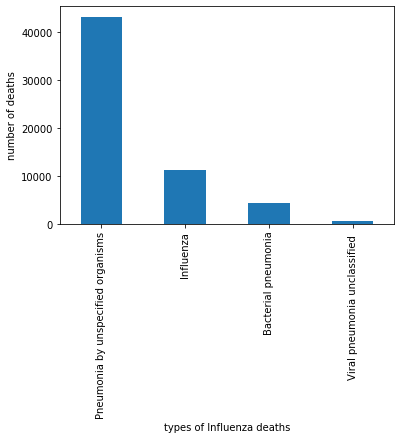

In [210]:
# acc['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
acc['cause_recode_desc'].value_counts().plot(kind='bar', x='cause_recode_desc')
# acc.plot(kind='bar',alpha=0.75, rot=45)
plt.xlabel("types of Influenza deaths")
plt.ylabel("number of deaths")

In [211]:
# find top 10 count
def top_val_count(x, n=100):
    return x.value_counts().head(n)

# groupby and find top 100 frequencies
gb = acc.groupby(['sex']).cause_recode_desc
acc_top_freq = gb.apply(top_val_count)
# acc_top_freq.rename(columns=dict(level_2='cause_recode_358', cause_recode_358='CoD_count'))
acc_top_freq

sex                                    
F    Pneumonia by unspecified organisms    22010
     Influenza                              6069
     Bacterial pneumonia                    2063
     Viral pneumonia unclassified            295
M    Pneumonia by unspecified organisms    21170
     Influenza                              5095
     Bacterial pneumonia                    2157
     Viral pneumonia unclassified            261
Name: cause_recode_desc, dtype: int64

In [212]:
#Joining recode_12
acc =pd.merge(acc, acc_desc_df,on='cause_recode_358',how='left')
acc.info() # 59,119 for 2018

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59120 entries, 0 to 59119
Data columns (total 98 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   person_id                        59120 non-null  int64  
 1   year_id                          59120 non-null  int64  
 2   resident_status                  59120 non-null  int64  
 3   edu                              59120 non-null  int64  
 4   edu_1989_rev                     59120 non-null  object 
 5   edu_1989_Desc                    0 non-null      float64
 6   edu_2003_rev                     59120 non-null  int64  
 7   edu_2003_Desc                    59120 non-null  object 
 8   edu_reporting_flag               59120 non-null  int64  
 9   month_of_death                   59120 non-null  int64  
 10  sex                              59120 non-null  object 
 11  reported_age_tmstmp_flag         59120 non-null  int64  
 12  reported_age      

Text(0, 0.5, 'number of deaths')

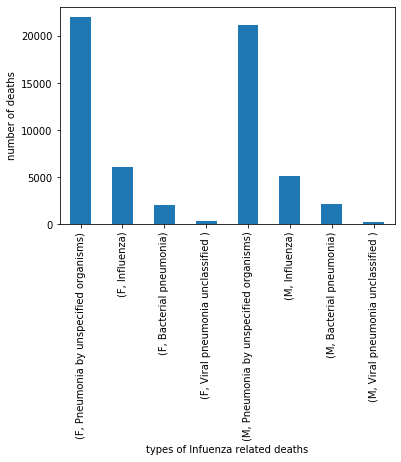

In [213]:
acc_top_freq.plot(kind='bar', x='cause_recode_desc')
plt.xlabel("types of Infuenza related deaths")
plt.ylabel("number of deaths")

In [214]:
#Joining age related tables age_12
# acc.info()
acc =pd.merge(acc, age_12,on='age_recode_12',how='left')


In [220]:
#Show age related fields
filter_col = [col for col in acc if col.startswith('age')]
filter_col
acc[filter_col]

,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,age_recode_12_desc,age_recode_27_desc
0,1093,,44,24,11,85 years and over,90 - 94 years
1,1084,,42,22,10,75 - 84 years,80 - 84 years
2,1066,,39,19,09,65 - 74 years,65 - 69 years
3,1080,,42,22,10,75 - 84 years,80 - 84 years
4,1062,,38,18,08,55 - 64 years,60 - 64 years
...,...,...,...,...,...,...,...
59115,1069,,39,19,09,65 - 74 years,65 - 69 years
59116,1073,,40,20,09,65 - 74 years,70 - 74 years
59117,1072,,40,20,09,65 - 74 years,70 - 74 years
59118,1098,,45,25,11,85 years and over,95 - 99 years


In [218]:
#Joining age related tables age_27
# age_27
acc =pd.merge(acc, age_27,on='age_recode_27',how='left')
 
 

In [221]:
#Show age related fields
filter_col = [col for col in acc if col.startswith('age')]
filter_col
acc[filter_col]

,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,age_recode_12_desc,age_recode_27_desc
0,1093,,44,24,11,85 years and over,90 - 94 years
1,1084,,42,22,10,75 - 84 years,80 - 84 years
2,1066,,39,19,09,65 - 74 years,65 - 69 years
3,1080,,42,22,10,75 - 84 years,80 - 84 years
4,1062,,38,18,08,55 - 64 years,60 - 64 years
...,...,...,...,...,...,...,...
59115,1069,,39,19,09,65 - 74 years,65 - 69 years
59116,1073,,40,20,09,65 - 74 years,70 - 74 years
59117,1072,,40,20,09,65 - 74 years,70 - 74 years
59118,1098,,45,25,11,85 years and over,95 - 99 years


In [246]:
#Joining age related tables age_52
acc =pd.merge(acc,age_52,on='age_recode_52',how='left')
 
# age_52
#Show age related fields
filter_col = [col for col in acc if col.startswith('age')]
filter_col
acc[filter_col]

# age_52
acc['age_recode_52'].unique()
 
#Drop lenth fields not needed
# acc = acc.drop([col for col in acc.columns if '52_desc' in col],axis=1)
 

array(['44', '42', '39', '38', '43', '34', '46', '37', '32', '36', '40',
       '41', '30', '45', '33', '35', '31', '27', '28', '12', '24', '23',
       '47', '13', '25', '22', '15', '18', '29', '20', '14', '52', '26',
       '16', '19', '17', '48', '21', '02'], dtype=object)

In [247]:
#Show age related fields
filter_col = [col for col in acc if col.startswith('age')]
filter_col
acc[filter_col]

,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,age_recode_12_desc,age_recode_27_desc,age_recode_52_desc
0,1093,,44,24,11,85 years and over,90 - 94 years,90 - 94 years
1,1093,,44,24,11,85 years and over,90 - 94 years,90 - 94 years
2,1090,,44,24,11,85 years and over,90 - 94 years,90 - 94 years
3,1091,,44,24,11,85 years and over,90 - 94 years,90 - 94 years
4,1092,,44,24,11,85 years and over,90 - 94 years,90 - 94 years
...,...,...,...,...,...,...,...,...
59115,2010,,21,02,01,Under 1 yr,1 month - 11 months,10 month
59116,2010,,21,02,01,Under 1 yr,1 month - 11 months,10 month
59117,2010,,21,02,01,Under 1 yr,1 month - 11 months,10 month
59118,2010,,21,02,01,Under 1 yr,1 month - 11 months,10 month


In [216]:
#Drop lenth fields not needed
acc = acc.drop([col for col in acc.columns if 'Length' in col],axis=1)
# age_12
# age_52





Text(0, 0.5, 'number of deaths')

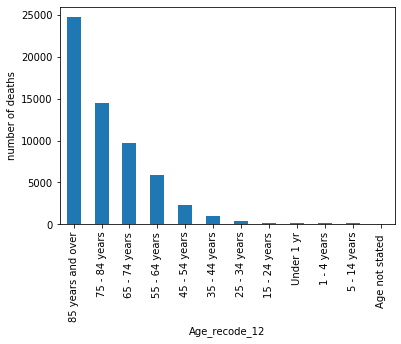

In [248]:
# acc['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
acc['age_recode_12_desc'].value_counts().plot(kind='bar', x='age_recode_12_desc')
# acc.plot(kind='bar',alpha=0.75, rot=45)
plt.xlabel("Age_recode_12")
plt.ylabel("number of deaths")

Text(0, 0.5, 'number of deaths')

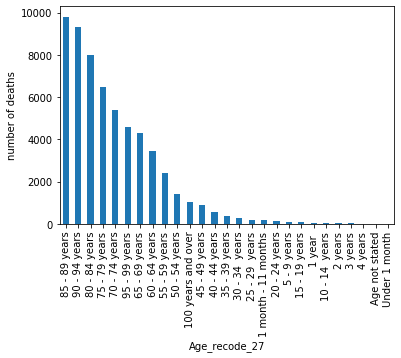

In [249]:
# acc['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
acc['age_recode_27_desc'].value_counts().plot(kind='bar', x='age_recode_27_desc')
# acc.plot(kind='bar',alpha=0.75, rot=45)
plt.xlabel("Age_recode_27")
plt.ylabel("number of deaths")

Text(0, 0.5, 'number of deaths')

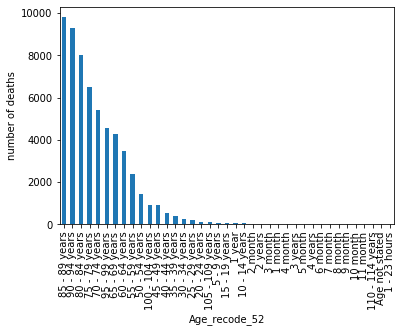

In [250]:
# acc['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
acc['age_recode_52_desc'].value_counts().plot(kind='bar', x='age_recode_52_desc')
# acc.plot(kind='bar',alpha=0.75, rot=45)
plt.xlabel("Age_recode_52")
plt.ylabel("number of deaths")